In [1]:
import nltk
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import string # special operations on strings
import spacy # language models

from matplotlib.pyplot import imread
from matplotlib import pyplot as plt
from wordcloud import WordCloud
%matplotlib inline

In [2]:
book=pd.read_csv("C:/Users/Yogendra/Downloads/Elon_musk.csv",error_bad_lines=False)

C:\Users\Yogendra\AppData\Local\Temp\ipykernel_14264\3111282710.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  book=pd.read_csv("C:/Users/Yogendra/Downloads/Elon_musk.csv",error_bad_lines=False)


In [3]:
book

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
book.drop(['Unnamed: 0'],inplace=True,axis=1)

In [5]:
book

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [6]:
#Text Preprocessing

In [7]:
book=[Text.strip() for Text in book.Text] # remove both the leading and the trailing characters
book=[Text for Text in book if Text] # removes empty strings, because they are considered in Python as False
book[0:10]

['@kunalb11 I’m an alien',
 '@ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated',
 '@teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!!',
 'Happy New Year of the Ox! https://t.co/9WFKMYu2oj',
 'Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM',
 '@OwenSparks_ @flcnhvy @anonyx10 Haha thanks :)',
 '@flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely']

In [8]:
# Joining the list into one string/text
book_text=' '.join(book)
book_text

'@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level. Have you tried it? @joerogan @Spotify Great interview! @gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year. Now on to the next for even more!! Happy New Year of the Ox! https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all. https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed! Tweets definitely do not represent real-world time allocation. The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my account @AstroJordy <U+0001F923><U+0001F

In [9]:
# remove Twitter username handles from a given twitter text. (Removes @usernames)
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer(strip_handles=True)
book_tokens=tknzr.tokenize(book_text)
print(book_tokens)

['I', '’', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'next-level', '.', 'Have', 'you', 'tried', 'it', '?', 'Great', 'interview', '!', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', '.', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', '!', '!', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', '!', 'https://t.co/9WFKMYu2oj', 'Frodo', 'was', 'the', 'underdoge', ',', 'All', 'thought', 'he', 'would', 'fail', ',', 'Himself', 'most', 'of', 'all', '.', 'https://t.co/zGxJFDzzrM', 'Haha', 'thanks', ':)', 'Indeed', '!', 'Tweets', 'definitely', 'do', 'not', 'represent', 'real-world', 'time', 'allocation', '.', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'https://t.co/3rWE9uHSTS', 'It', '’', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', ',', 'so', 'he', 'can', 'be'

In [10]:
# Again Joining the list into one string/text
book_tokens_text=' '.join(book_tokens)
book_tokens_text

'I ’ m an alien Ray tracing on Cyberpunk with HDR is next-level . Have you tried it ? Great interview ! Doge is underestimated Congratulations Tesla China for amazing execution last year . Now on to the next for even more ! ! Happy New Year of the Ox ! https://t.co/9WFKMYu2oj Frodo was the underdoge , All thought he would fail , Himself most of all . https://t.co/zGxJFDzzrM Haha thanks :) Indeed ! Tweets definitely do not represent real-world time allocation . The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with https://t.co/3rWE9uHSTS It ’ s getting real Bought some Dogecoin for lil X , so he can be a toddler hodler He definitely has issues , but the sentencing seems a bit high Thanks for fixing Please unlock my account <U+0001F923> <U+0001F923> This is true power haha https://t.co/Fc9uhQSd7O Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT : NASA has selected Falcon Heavy to launch th

In [11]:
# Remove Punctuations 
no_punc_book=book_tokens_text.translate(str.maketrans('','',string.punctuation))
no_punc_book

'I ’ m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox  httpstco9WFKMYu2oj Frodo was the underdoge  All thought he would fail  Himself most of all  httpstcozGxJFDzzrM Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with httpstco3rWE9uHSTS It ’ s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha httpstcoFc9uhQSd7O Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway tog

In [12]:
# remove url / https within text
import re
no_url_book=re.sub(r'http\S+', '', no_punc_book)
no_url_book

'I ’ m an alien Ray tracing on Cyberpunk with HDR is nextlevel  Have you tried it  Great interview  Doge is underestimated Congratulations Tesla China for amazing execution last year  Now on to the next for even more   Happy New Year of the Ox   Frodo was the underdoge  All thought he would fail  Himself most of all   Haha thanks  Indeed  Tweets definitely do not represent realworld time allocation  The most entertaining outcome is the most likely Just sent some Just agree to do Clubhouse with  It ’ s getting real Bought some Dogecoin for lil X  so he can be a toddler hodler He definitely has issues  but the sentencing seems a bit high Thanks for fixing Please unlock my account U0001F923 U0001F923 This is true power haha  Any crypto wallet that won ’ t give you your private keys should be avoided at all costs Your app sucks RT  NASA has selected Falcon Heavy to launch the first two elements of the lunar Gateway together on one mission   Yes Once we can predict cash flow reasonably well

In [13]:
#tokanizing the words
from nltk.tokenize import word_tokenize
book_tokens=word_tokenize(no_url_book)
print(book_tokens)

['I', '’', 'm', 'an', 'alien', 'Ray', 'tracing', 'on', 'Cyberpunk', 'with', 'HDR', 'is', 'nextlevel', 'Have', 'you', 'tried', 'it', 'Great', 'interview', 'Doge', 'is', 'underestimated', 'Congratulations', 'Tesla', 'China', 'for', 'amazing', 'execution', 'last', 'year', 'Now', 'on', 'to', 'the', 'next', 'for', 'even', 'more', 'Happy', 'New', 'Year', 'of', 'the', 'Ox', 'Frodo', 'was', 'the', 'underdoge', 'All', 'thought', 'he', 'would', 'fail', 'Himself', 'most', 'of', 'all', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'do', 'not', 'represent', 'realworld', 'time', 'allocation', 'The', 'most', 'entertaining', 'outcome', 'is', 'the', 'most', 'likely', 'Just', 'sent', 'some', 'Just', 'agree', 'to', 'do', 'Clubhouse', 'with', 'It', '’', 's', 'getting', 'real', 'Bought', 'some', 'Dogecoin', 'for', 'lil', 'X', 'so', 'he', 'can', 'be', 'a', 'toddler', 'hodler', 'He', 'definitely', 'has', 'issues', 'but', 'the', 'sentencing', 'seems', 'a', 'bit', 'high', 'Thanks', 'for', 'fixing', 'Plea

In [14]:
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yogendra\anaconda3\lib\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yogendra\anaconda3\lib\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
len(book_tokens) #Counting tokens

18324

In [16]:
# Removing Stopwords
from nltk.corpus import stopwords
stop_words_list=stopwords.words('english')

ext_list = ['\x92','rt','ye','yeah','haha','Yes','U0001F923','I']
stop_words_list.extend(ext_list)

book_no_stop_tokens=[word for word in book_tokens if not word in stop_words_list]
print(book_no_stop_tokens)

['’', 'alien', 'Ray', 'tracing', 'Cyberpunk', 'HDR', 'nextlevel', 'Have', 'tried', 'Great', 'interview', 'Doge', 'underestimated', 'Congratulations', 'Tesla', 'China', 'amazing', 'execution', 'last', 'year', 'Now', 'next', 'even', 'Happy', 'New', 'Year', 'Ox', 'Frodo', 'underdoge', 'All', 'thought', 'would', 'fail', 'Himself', 'Haha', 'thanks', 'Indeed', 'Tweets', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'The', 'entertaining', 'outcome', 'likely', 'Just', 'sent', 'Just', 'agree', 'Clubhouse', 'It', '’', 'getting', 'real', 'Bought', 'Dogecoin', 'lil', 'X', 'toddler', 'hodler', 'He', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'Thanks', 'fixing', 'Please', 'unlock', 'account', 'This', 'true', 'power', 'Any', 'crypto', 'wallet', '’', 'give', 'private', 'keys', 'avoided', 'costs', 'Your', 'app', 'sucks', 'RT', 'NASA', 'selected', 'Falcon', 'Heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'Gateway', 'together', 'one', 'mission', 'Once', 'predict

In [17]:
# Normalizing the word list
lcase_words=[Text.lower() for Text in book_no_stop_tokens]
print(lcase_words[50:250])

['agree', 'clubhouse', 'it', '’', 'getting', 'real', 'bought', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issues', 'sentencing', 'seems', 'bit', 'high', 'thanks', 'fixing', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', '’', 'give', 'private', 'keys', 'avoided', 'costs', 'your', 'app', 'sucks', 'rt', 'nasa', 'selected', 'falcon', 'heavy', 'launch', 'first', 'two', 'elements', 'lunar', 'gateway', 'together', 'one', 'mission', 'once', 'predict', 'cash', 'flow', 'reasonably', 'well', 'starlink', 'ipo', 'starlink', 'staggeringly', 'difficult', 'technical', 'economic', 'endeavor', 'however', '…', 'spacex', 'needs', 'pass', 'deep', 'chasm', 'negative', 'cash', 'flow', 'next', 'year', '…', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequestered', 'net', 'value', 'product', 'made', 'must', 'scalable', 'g', '…', 'it', '’', 'meant', 'price', 'countries', 'only', 'difference', 'taxes', 'shipping', 'this', 'intended', 'earth', 'may', 'ideas

In [18]:
# Stemming 
from nltk.stem import PorterStemmer
ps=PorterStemmer()
stem_tokens=[ps.stem(word) for word in lcase_words]
print(stem_tokens[100:200])

['togeth', 'one', 'mission', 'onc', 'predict', 'cash', 'flow', 'reason', 'well', 'starlink', 'ipo', 'starlink', 'staggeringli', 'difficult', 'technic', 'econom', 'endeavor', 'howev', '…', 'spacex', 'need', 'pass', 'deep', 'chasm', 'neg', 'cash', 'flow', 'next', 'year', '…', 'lowest', 'cost', 'per', 'ton', 'carbon', 'sequest', 'net', 'valu', 'product', 'made', 'must', 'scalabl', 'g', '…', 'it', '’', 'meant', 'price', 'countri', 'onli', 'differ', 'tax', 'ship', 'thi', 'intend', 'earth', 'may', 'idea', 'appli', 'mar', 'xprize', 'team', 'manag', '100m', 'carbon', 'captur', 'prize', 'everyon', 'tesla', 'receiv', 'stock', 'my', 'comp', 'stock', 'option', 'take', 'tabl', 'that', '’', '’', 'miss', 'back', 'work', 'go', '…', 'doe', 'seem', 'bit', 'high', 'doge', 'appear', 'inflationari', 'meaning', 'fix', 'coin', 'per', 'unit', 'time', 'wherea', '…']


In [19]:
#some stems are errotic

In [20]:
# Lemmatization
spc=spacy.load('en_core_web_sm')

In [21]:
lemm=spc(' '.join(lcase_words))
print(lemm)

’ alien ray tracing cyberpunk hdr nextlevel have tried great interview doge underestimated congratulations tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thanks indeed tweets definitely represent realworld time allocation the entertaining outcome likely just sent just agree clubhouse it ’ getting real bought dogecoin lil x toddler hodler he definitely issues sentencing seems bit high thanks fixing please unlock account this true power any crypto wallet ’ give private keys avoided costs your app sucks rt nasa selected falcon heavy launch first two elements lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however … spacex needs pass deep chasm negative cash flow next year … lowest cost per ton carbon sequestered net value product made must scalable g … it ’ meant price countries only difference taxes shipping this i

In [22]:
lemmas=[token.lemma_ for token in lemm]
print(lemmas)

["'", 'alien', 'ray', 'trace', 'cyberpunk', 'hdr', 'nextlevel', 'have', 'try', 'great', 'interview', 'doge', 'underestimate', 'congratulation', 'tesla', 'china', 'amazing', 'execution', 'last', 'year', 'now', 'next', 'even', 'happy', 'new', 'year', 'ox', 'frodo', 'underdoge', 'all', 'thought', 'would', 'fail', 'himself', 'haha', 'thank', 'indeed', 'tweet', 'definitely', 'represent', 'realworld', 'time', 'allocation', 'the', 'entertaining', 'outcome', 'likely', 'just', 'send', 'just', 'agree', 'clubhouse', 'it', "'", 'get', 'real', 'buy', 'dogecoin', 'lil', 'x', 'toddler', 'hodler', 'he', 'definitely', 'issue', 'sentencing', 'seem', 'bit', 'high', 'thank', 'fix', 'please', 'unlock', 'account', 'this', 'true', 'power', 'any', 'crypto', 'wallet', "'", 'give', 'private', 'key', 'avoid', 'cost', 'your', 'app', 'suck', 'rt', 'nasa', 'select', 'falcon', 'heavy', 'launch', 'first', 'two', 'element', 'lunar', 'gateway', 'together', 'one', 'mission', 'once', 'predict', 'cash', 'flow', 'reasonabl

In [23]:
clean_chats=' '.join(lemmas)
clean_chats

'\' alien ray trace cyberpunk hdr nextlevel have try great interview doge underestimate congratulation tesla china amazing execution last year now next even happy new year ox frodo underdoge all thought would fail himself haha thank indeed tweet definitely represent realworld time allocation the entertaining outcome likely just send just agree clubhouse it \' get real buy dogecoin lil x toddler hodler he definitely issue sentencing seem bit high thank fix please unlock account this true power any crypto wallet \' give private key avoid cost your app suck rt nasa select falcon heavy launch first two element lunar gateway together one mission once predict cash flow reasonably well starlink ipo starlink staggeringly difficult technical economic endeavor however … spacex need pass deep chasm negative cash flow next year … low cost per ton carbon sequester net value product make must scalable g … it \' mean price country only difference taxis ship this intend earth may idea apply mar xprize

In [24]:
#Feature extraction

In [25]:
# CountVectorizer

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
cvec=CountVectorizer()
chatcv=cvec.fit_transform(lemmas)

In [27]:
print(cvec.vocabulary_)

{'alien': 194, 'ray': 2344, 'trace': 3009, 'cyberpunk': 766, 'hdr': 1357, 'nextlevel': 1957, 'have': 1352, 'try': 3039, 'great': 1304, 'interview': 1554, 'doge': 889, 'underestimate': 3172, 'congratulation': 674, 'tesla': 2914, 'china': 583, 'amazing': 217, 'execution': 1058, 'last': 1637, 'year': 3389, 'now': 1984, 'next': 1956, 'even': 1032, 'happy': 1339, 'new': 1954, 'ox': 2085, 'frodo': 1207, 'underdoge': 3171, 'all': 197, 'thought': 2951, 'would': 3374, 'fail': 1092, 'himself': 1400, 'haha': 1327, 'thank': 2925, 'indeed': 1495, 'tweet': 3054, 'definitely': 803, 'represent': 2410, 'realworld': 2359, 'time': 2967, 'allocation': 199, 'the': 2930, 'entertaining': 1002, 'outcome': 2064, 'likely': 1692, 'just': 1596, 'send': 2553, 'agree': 179, 'clubhouse': 612, 'it': 1573, 'get': 1265, 'real': 2354, 'buy': 502, 'dogecoin': 891, 'lil': 1693, 'toddler': 2979, 'hodler': 1406, 'he': 1358, 'issue': 1572, 'sentencing': 2558, 'seem': 2545, 'bit': 418, 'high': 1392, 'fix': 1153, 'please': 217

In [28]:
print(chatcv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [29]:
print(chatcv.toarray().shape)

(12265, 3409)


In [30]:
#CountVectorizer with N-grams (Bigrams & Trigrams)

In [31]:
cv_ngram_range=CountVectorizer(analyzer='word',ngram_range=(1,3),max_features=100)
bow_matrix_ngram=cv_ngram_range.fit_transform(lemmas)

In [32]:
print(cv_ngram_range.get_feature_names_out())
print(bow_matrix_ngram.toarray())

['actually' 'ai' 'also' 'back' 'big' 'booster' 'car' 'come' 'cool' 'could'
 'crew' 'day' 'design' 'do' 'dragon' 'earth' 'engine' 'even' 'ever'
 'exactly' 'falcon' 'first' 'flight' 'fsd' 'future' 'get' 'go' 'good'
 'great' 'haha' 'hard' 'high' 'if' 'it' 'land' 'launch' 'life' 'like'
 'look' 'lot' 'love' 'make' 'many' 'mar' 'maybe' 'mission' 'model' 'month'
 'much' 'need' 'new' 'next' 'no' 'not' 'ok' 'one' 'part' 'people' 'point'
 'pretty' 'probably' 'production' 'right' 'rocket' 'rt' 'say' 'seem'
 'soon' 'space' 'spacex' 'starlink' 'starship' 'still' 'super' 'sure'
 'take' 'tesla' 'test' 'thank' 'that' 'the' 'there' 'they' 'think' 'this'
 'time' 'true' 'try' 'ufe0f' 'use' 'way' 'we' 'week' 'well' 'will' 'work'
 'would' 'yeah' 'year' 'you']
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [33]:
#TF-IDF Vectorizer

In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfv_ngrams=TfidfVectorizer(norm='l2',analyzer='word',ngram_range=(1,3),max_features=500)
tfidf_ngram=tfidfv_ngrams.fit_transform(lemmas)
print(tfidfv_ngrams.get_feature_names_out())
print(tfidf_ngram.toarray())

['10' '100' '13' '20' '2020' '30' '300' '40' '4d' '60' 'able' 'absolutely'
 'access' 'accurate' 'actually' 'add' 'after' 'ago' 'agree' 'ai' 'aim'
 'air' 'all' 'almost' 'already' 'also' 'although' 'always' 'amazing' 'and'
 'another' 'appear' 'apply' 'appreciate' 'around' 'article' 'as'
 'astronaut' 'at' 'autopilot' 'awesome' 'back' 'bad' 'bar' 'base'
 'battery' 'be' 'become' 'berlin' 'beta' 'big' 'bit' 'boca' 'body'
 'booster' 'brain' 'bs' 'build' 'burn' 'but' 'buy' 'cake' 'call' 'camera'
 'can' 'car' 'cargo' 'catch' 'cell' 'ch4' 'chance' 'change' 'china'
 'close' 'cold' 'color' 'come' 'company' 'complete' 'computer' 'confirm'
 'congratulation' 'control' 'cool' 'cost' 'could' 'course' 'cov' 'crazy'
 'create' 'crew' 'critical' 'curevac' 'cyberpunk' 'cybertruck' 'datum'
 'day' 'deep' 'definitely' 'delivery' 'design' 'detail' 'difference'
 'different' 'do' 'dock' 'doge' 'dojo' 'dragon' 'drive' 'droneship' 'due'
 'dumb' 'early' 'earth' 'easy' 'electric' 'enable' 'end' 'energy' 'engine'
 'en

In [35]:
#Generate Word Cloud

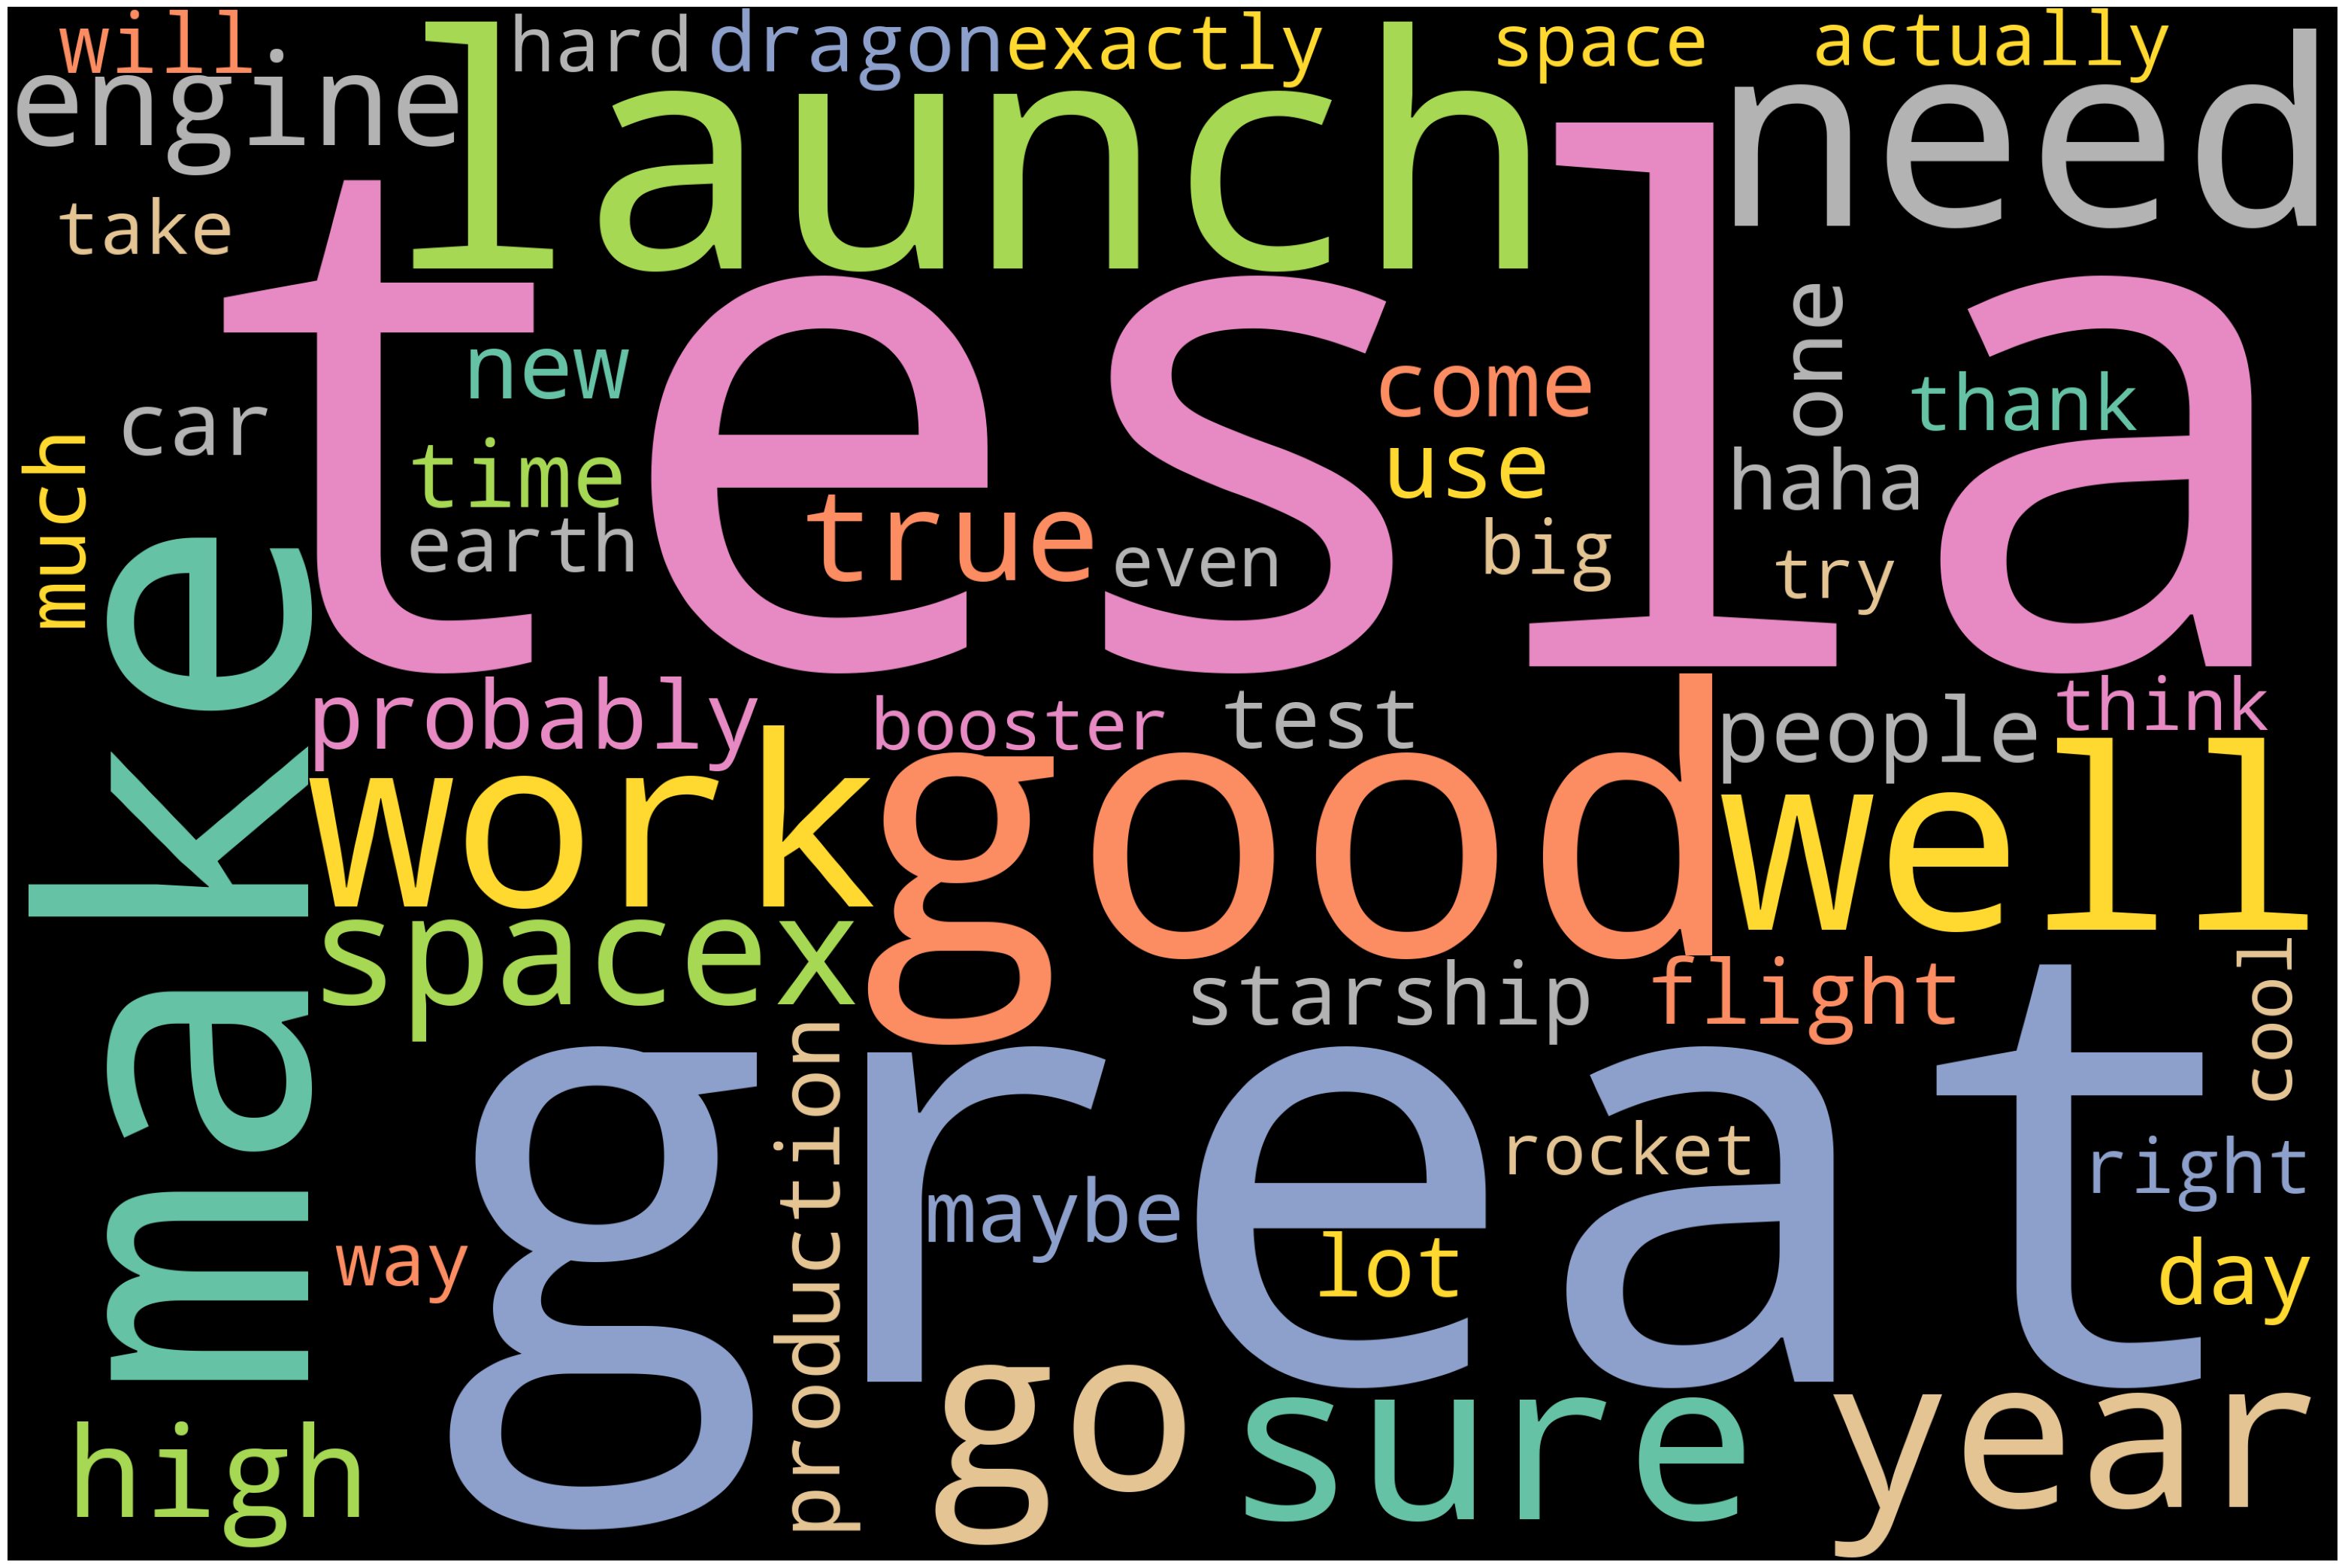

In [36]:
# Defining a function to plot word cloud
from wordcloud import STOPWORDS
def cloud(wordcloud):
    plt.figure(figsize=(40,30))
    plt.imshow(wordcloud)
    plt.axis('off')
    
# Generate Word Cloud

STOPWORDS.add('pron')
STOPWORDS.add('rt')
STOPWORDS.add('yeah')
wordcloud=WordCloud(width=3000,height=2000,background_color='black',max_words=50,
                   colormap='Set2',stopwords=STOPWORDS).generate(clean_chats)
cloud(wordcloud)

In [37]:
#Named Entity Recognition (NER)

In [38]:
# Parts Of Speech (POS) Tagging
nlp=spacy.load('en_core_web_sm')

one_block=clean_chats
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [39]:
#Some NER POS is incorrect

In [40]:
for token in doc_block[100:200]:
    print(token,token.pos_)

together ADV
one NUM
mission NOUN
once ADV
predict VERB
cash NOUN
flow NOUN
reasonably ADV
well ADV
starlink NOUN
ipo PROPN
starlink NOUN
staggeringly ADV
difficult ADJ
technical ADJ
economic ADJ
endeavor NOUN
however ADV
… PUNCT
spacex VERB
need AUX
pass VERB
deep ADJ
chasm ADJ
negative ADJ
cash NOUN
flow NOUN
next ADJ
year NOUN
… PUNCT
low ADJ
cost NOUN
per ADP
ton NOUN
carbon NOUN
sequester NOUN
net ADJ
value NOUN
product NOUN
make VERB
must AUX
scalable VERB
g NOUN
… PUNCT
it PRON
' PUNCT
mean VERB
price NOUN
country NOUN
only ADV
difference NOUN
taxis NOUN
ship NOUN
this PRON
intend VERB
earth NOUN
may AUX
idea NOUN
apply VERB
mar PROPN
xprize PROPN
team NOUN
manage VERB
100 NUM
m PROPN
carbon NOUN
capture NOUN
prize NOUN
everyone PRON
tesla NOUN
receive VERB
stock NOUN
my PRON
comp NOUN
stock NOUN
option NOUN
take VERB
table NOUN
that SCONJ
' PUNCT
' PUNCT
miss VERB
back ADP
work NOUN
go NOUN
… PUNCT
do AUX
seem VERB
bit NOUN
high ADJ
doge PROPN
appear VERB
inflationary ADJ
meani

In [41]:
# Filtering only the nouns and verbs
n_v=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(n_v[100:200])

['fix', 'unit', 'time', 'launch', 'tower', 'stack', 'raptor', 'orbit', 'booster', 'improve', 'ship', 'booster', 'mass', 'back', 'work', 'tonight', 'video', 'people', 'speak', 'cute', 'image', 'reflect', 'time', 'cost', 'people', 'rain', 'pain', 'u0001f3b6', 'let', 'doge', 'come', 'fun', 'crypto', 'simplicity', 'genius', 'decade', 'work', 'look', 'note', 'email', 'text', 'lesson', 'learn', 'earth', 'time', 'tell', 'story', 'tesla', 'read', 'kingdom', 'hear', 'name', 'year', 'dogecake', 'thing', 'restaurant', 'hang', 'currency', 'earth', 'scratch', 'destiny', 'franz', 'say', 'ship', 'landing', 'burn', 'solution', 'greate', 'use', 'gas', 'maneuvering', 'rcs', 'thruster', 'seem', 'raptor', 'launch', 'mission', 'collect', 'datum', 'galaxy', 'explore', 'launch', 'starlink', 'satellite', 'orbit', 'mission', 'pad', '39a', 'deck', 'default', 'engine', 'lever', 'arm', 'shut', 'engine', 'min', 'throttle', 'point', 'risk', 'start']


In [42]:
# Counting the noun & verb tokens
cv=CountVectorizer()

X=cv.fit_transform(n_v)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:20] # viewing top 20 results

,word,count
0,tesla,72
1,make,64
2,launch,61
3,year,49
4,work,47
5,need,47
6,go,44
7,come,42
8,get,39
9,day,38


<Axes: title={'center': 'Top 20 nouns and verbs'}, xlabel='word'>

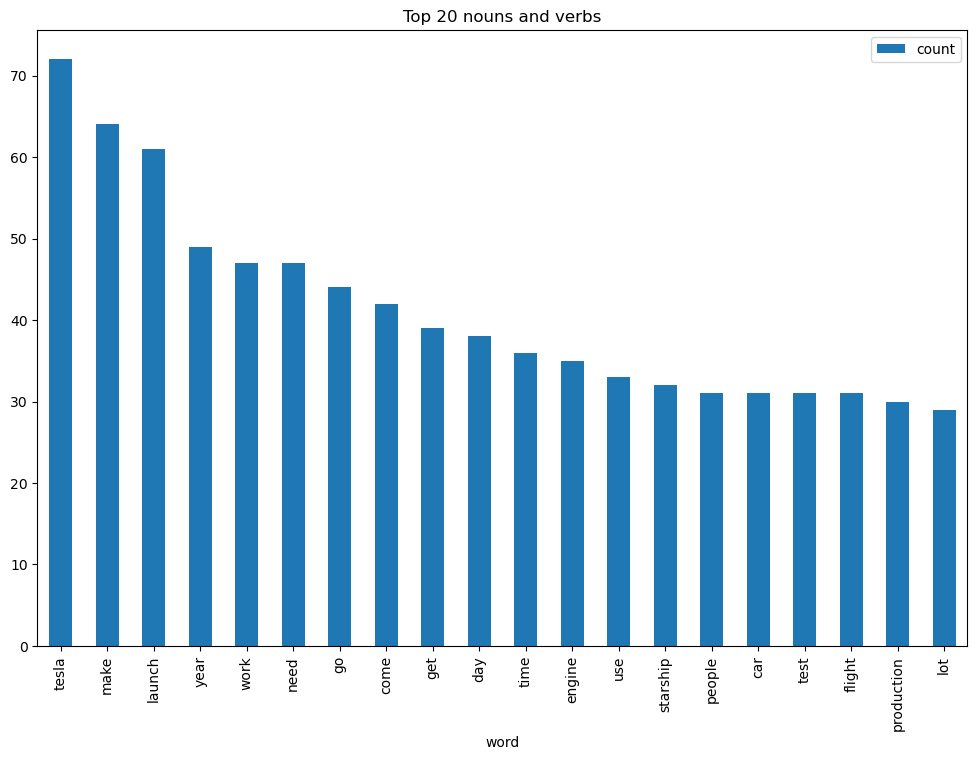

In [43]:
# Visualizing results (Barchart for top 20 nouns + verbs)
wd_df[0:20].plot.bar(x='word',figsize=(12,8),title='Top 20 nouns and verbs')

In [44]:
#Emotion Mining - Sentiment Analysis

In [45]:
from nltk import tokenize
sentence=tokenize.sent_tokenize(' '.join(book))
sentence

['@kunalb11 I’m an alien @ID_AA_Carmack Ray tracing on Cyberpunk with HDR is next-level.',
 'Have you tried it?',
 '@joerogan @Spotify Great interview!',
 '@gtera27 Doge is underestimated @teslacn Congratulations Tesla China for amazing execution last year.',
 'Now on to the next for even more!!',
 'Happy New Year of the Ox!',
 'https://t.co/9WFKMYu2oj Frodo was the underdoge,\nAll thought he would fail,\nHimself most of all.',
 'https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy @anonyx10 Haha thanks :) @flcnhvy @anonyx10 Indeed!',
 'Tweets definitely do not represent real-world time allocation.',
 'The most entertaining outcome is the most likely @GiveDirectly Just sent some Just agree to do Clubhouse with @kanyewest https://t.co/3rWE9uHSTS @geoffkeighley @UnrealEngine It’s getting real Bought some Dogecoin for lil X, so he can be a toddler hodler @JoshManMode He definitely has issues, but the sentencing seems a bit high @freewalletorg Thanks for fixing @freewalletorg Please unlock my acc

In [46]:
df=pd.DataFrame(sentence,columns=['sentence'])
df

,sentence
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...
1,Have you tried it?
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated @teslacn Congr...
4,Now on to the next for even more!!
...,...
912,"@kenyanwalstreet Not actually a payout, just a..."
913,"It may never pay out, as the stock can’t b… ht..."
914,Details Aug 28.
915,AI symbiosis while u wait @vistacruiser7 @flcn...


In [47]:
# Emotion Lexicon - Affin

In [48]:
affin=pd.read_csv('C:/Users/Yogendra/Downloads/AFINN.csv')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [49]:
affin_scores=affin.set_index('word')['value'].to_dict()
affin_scores

{'abandon': '-2',
 'abandoned': '-2',
 'abandons': '-2',
 'abducted': '-2',
 'abduction': '-2',
 'abductions': '-2',
 'abhor': '-3',
 'abhorred': '-3',
 'abhorrent': '-3',
 'abhors': '-3',
 'abilities': '2',
 'ability': '2',
 'aboard': '1',
 'absentee': '-1',
 'absentees': '-1',
 'absolve': '2',
 'absolved': '2',
 'absolves': '2',
 'absolving': '2',
 'absorbed': '1',
 'abuse': '-3',
 'abused': '-3',
 'abuses': '-3',
 'abusive': '-3',
 'accept': '1',
 'accepted': '1',
 'accepting': '1',
 'accepts': '1',
 'accident': '-2',
 'accidental': '-2',
 'accidentally': '-2',
 'accidents': '-2',
 'accomplish': '2',
 'accomplished': '2',
 'accomplishes': '2',
 'accusation': '-2',
 'accusations': '-2',
 'accuse': '-2',
 'accused': '-2',
 'accuses': '-2',
 'accusing': '-2',
 'ache': '-2',
 'achievable': '1',
 'aching': '-2',
 'acquit': '2',
 'acquits': '2',
 'acquitted': '2',
 'acquitting': '2',
 'acrimonious': '-3',
 'active': '1',
 'adequate': '1',
 'admire': '3',
 'admired': '3',
 'admires': '3',


In [50]:
# Function to score each word in a sentence in lemmatised form, and calculate the score for the entire sentence.
from afinn import Afinn
afn = Afinn()
sent_df = pd.DataFrame()
sent_df['sentence'] = sentence
sent_df['scores'] = [afn.score(article) for article in sentence]
sent_df['sentiments'] = ['positive' if score > 0
                          else 'negative' if score < 0
                              else 'neutral'
                                  for score in sent_df['scores']]

sent_df

,sentence,scores,sentiments
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0.0,neutral
1,Have you tried it?,0.0,neutral
2,@joerogan @Spotify Great interview!,3.0,positive
3,@gtera27 Doge is underestimated @teslacn Congr...,5.0,positive
4,Now on to the next for even more!!,0.0,neutral
...,...,...,...
912,"@kenyanwalstreet Not actually a payout, just a...",0.0,neutral
913,"It may never pay out, as the stock can’t b… ht...",-4.0,negative
914,Details Aug 28.,0.0,neutral
915,AI symbiosis while u wait @vistacruiser7 @flcn...,0.0,neutral


In [52]:
# Sentiment score of the whole review
sent_df['scores'].describe()

count    917.000000
mean       1.715376
std        3.070623
min       -9.000000
25%        0.000000
50%        1.000000
75%        3.000000
max       17.000000
Name: scores, dtype: float64

In [ ]:
# overall the doceument mood is positive

In [53]:
# negative sentiment score of the whole review
sent_df[sent_df['scores']<=0]

,sentence,scores,sentiments
0,@kunalb11 I’m an alien @ID_AA_Carmack Ray trac...,0.0,neutral
1,Have you tried it?,0.0,neutral
4,Now on to the next for even more!!,0.0,neutral
6,https://t.co/9WFKMYu2oj Frodo was the underdog...,-2.0,negative
8,Tweets definitely do not represent real-world ...,0.0,neutral
...,...,...,...
912,"@kenyanwalstreet Not actually a payout, just a...",0.0,neutral
913,"It may never pay out, as the stock can’t b… ht...",-4.0,negative
914,Details Aug 28.,0.0,neutral
915,AI symbiosis while u wait @vistacruiser7 @flcn...,0.0,neutral


In [54]:
# positive sentiment score of the whole review
sent_df[sent_df['scores']>0]

,sentence,scores,sentiments
2,@joerogan @Spotify Great interview!,3.0,positive
3,@gtera27 Doge is underestimated @teslacn Congr...,5.0,positive
5,Happy New Year of the Ox!,3.0,positive
7,https://t.co/zGxJFDzzrM @OwenSparks_ @flcnhvy ...,5.0,positive
9,The most entertaining outcome is the most like...,8.0,positive
...,...,...,...
904,He was one of the very best.,3.0,positive
906,"@Ali_Afshari In general, we need to improve ho...",4.0,positive
908,"@burakaydik True Wow, IHOP &amp; GitHub are cl...",9.0,positive
910,This is both great &amp; terrifying.,3.0,positive


C:\Users\Yogendra\AppData\Local\Temp\ipykernel_14264\2883141246.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sent_df['scores'])


<Axes: xlabel='scores', ylabel='Density'>

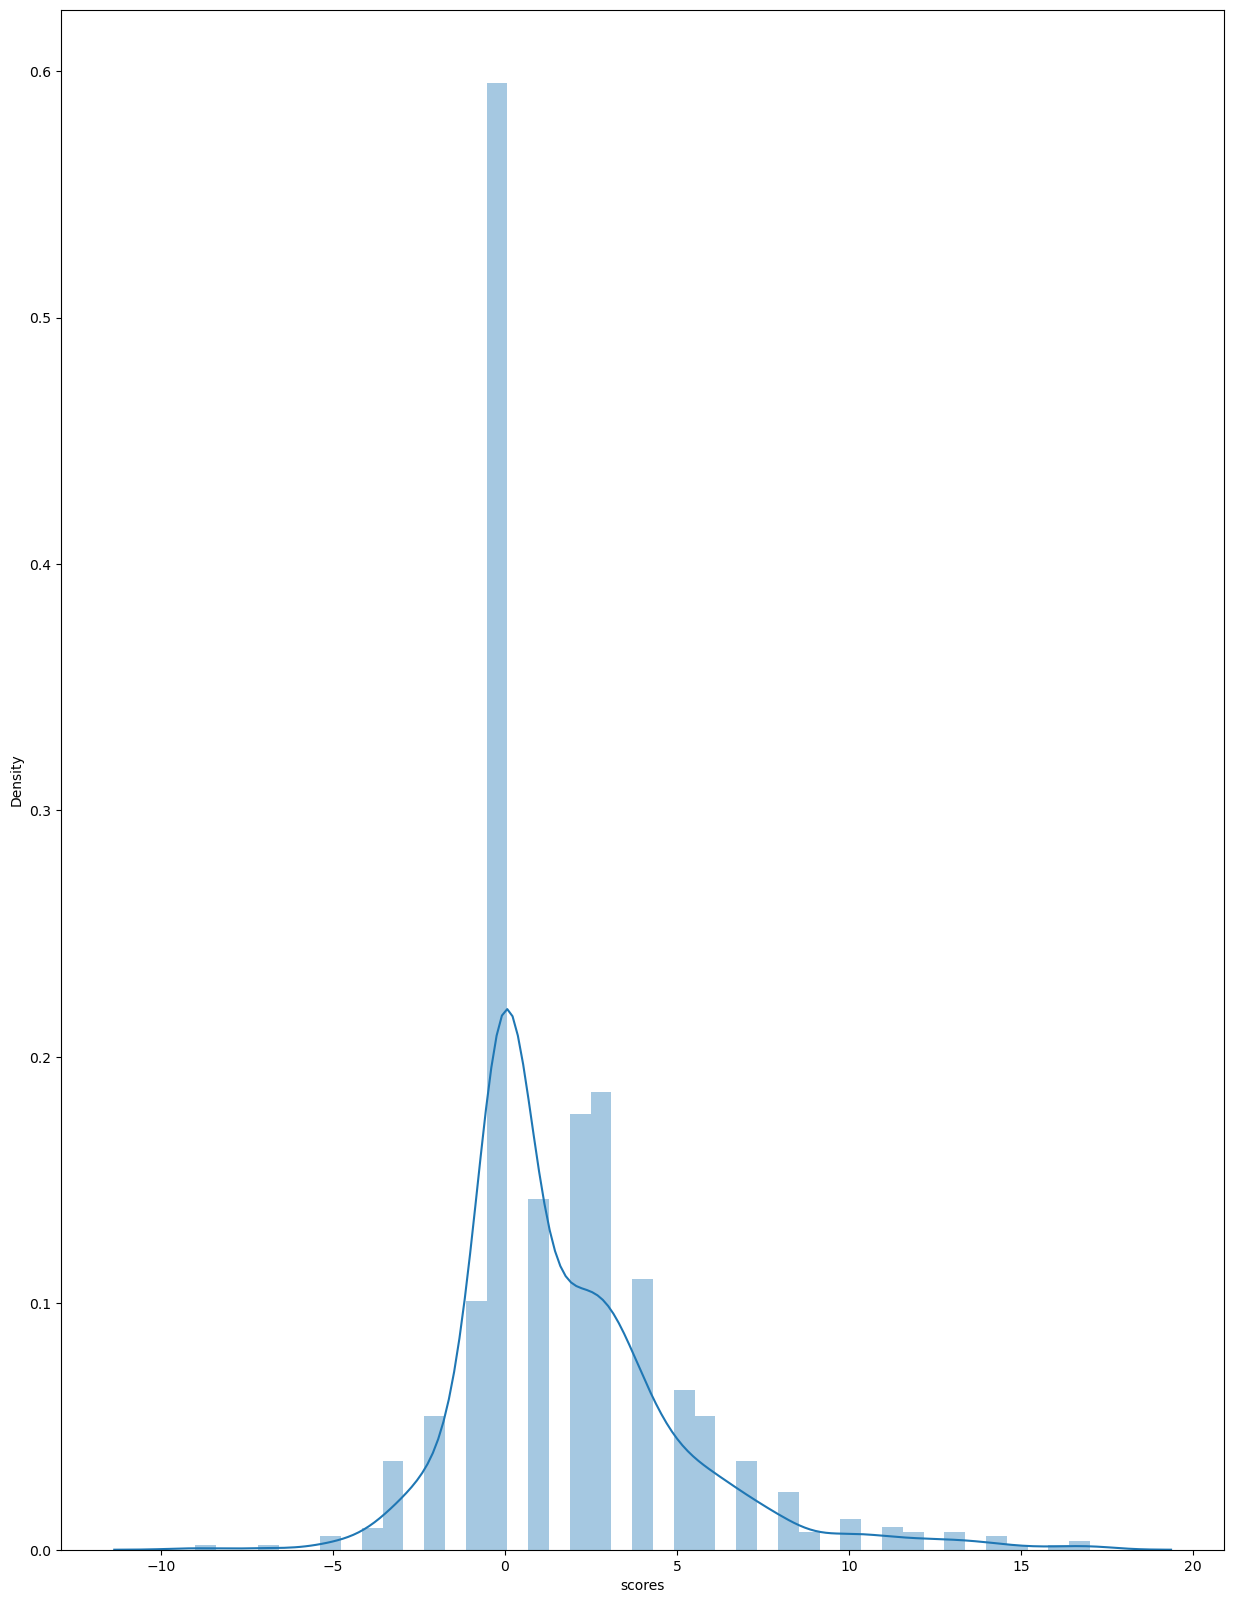

In [55]:
# Plotting the sentiment value for whole review
import seaborn as sns
plt.figure(figsize=(15,20))
sns.distplot(sent_df['scores'])

<Axes: xlabel='index', ylabel='scores'>

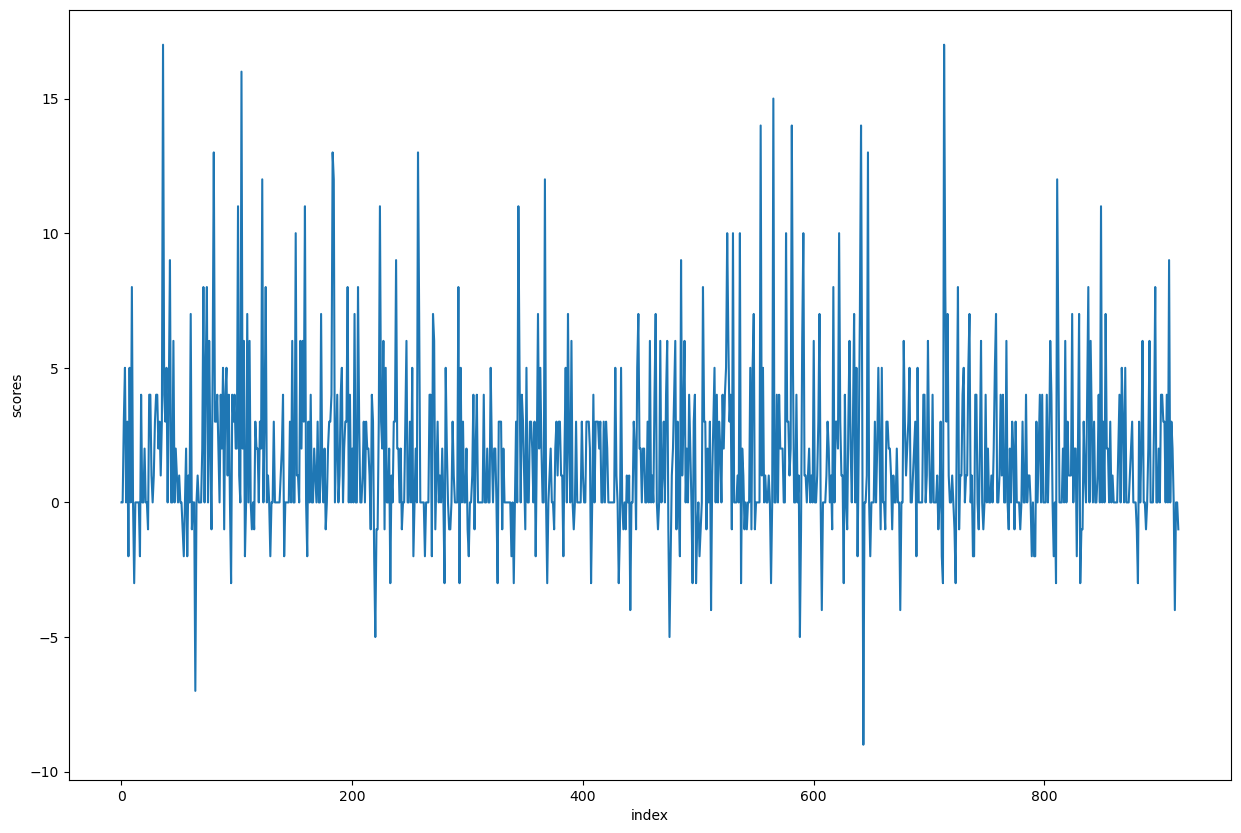

In [56]:
# Plotting the line plot for sentiment value of whole review
sent_df['index']=range(0,len(sent_df)) # Adding index cloumn
plt.figure(figsize=(15,10))
sns.lineplot(y='scores',x='index',data=sent_df)

<Axes: title={'center': 'Sentence sentiment score to sentence word count'}, xlabel='word_count', ylabel='scores'>

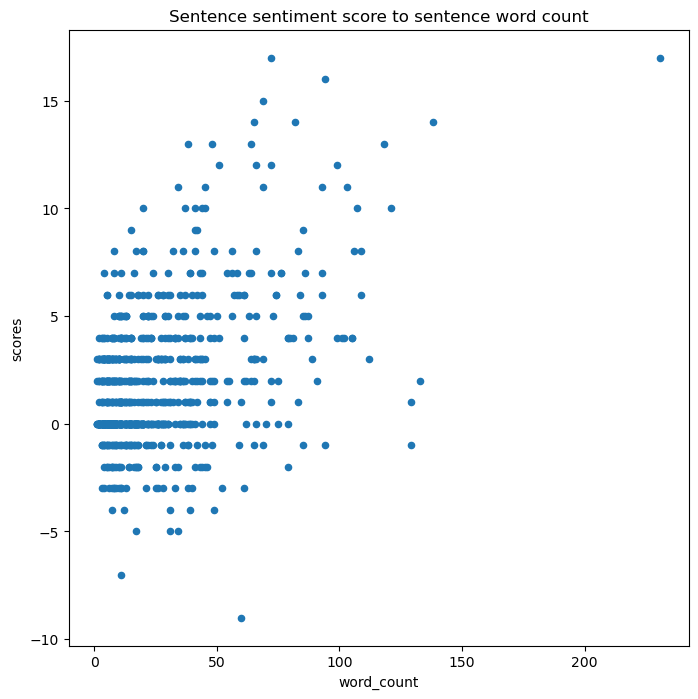

In [58]:
# how many words are there in a sentence?
sent_df['word_count']=sent_df['sentence'].str.split().apply(len)

# Correlation analysis
sent_df.plot.scatter(x='word_count',y='scores',figsize=(8,8),title='Sentence sentiment score to sentence word count')